### Problem 2

First of all, we need to define the first equipartition projection. This is done below, and tested on a simple array.

In [65]:
import numpy as np
import math
import matplotlib.pyplot as plt
from RRR import *

t = 3*4*5
sparse = 9

a = np.random.rand(3, 4, 5)


def sumProj(tensor, target):
    s = np.sum(tensor)
    h = np.shape(tensor)
    l = np.prod(h) #total # of elements in tensor
    a = (target - s)/l
    return tensor + (a*np.ones(h))

def transposeAxes(target, length):
    l = range(length)
    l[target] = 0
    l[0] = target
    return tuple(l)

def equiPartProj(tensor, target=1.0):
    h = np.shape(tensor)
    for i in range(len(h)):                                 #Iterate the axes
        ax = transposeAxes(i, len(h))
        tensor = np.transpose(tensor, ax)                   #Rotate
        for j in range(h[i]):                               #Iterate the slices
            tensor[j] = sumProj(tensor[j], target/h[i])     #Project
        tensor = np.transpose(tensor, ax)                   #Rotate back
    return tensor

a = equiPartProj(a)

print a



[[[-0.24187375 -0.30187747  0.05607461 -0.0572548  -0.31970071]
  [-0.18864677 -0.26320053  0.20785911  0.26870076  0.03315018]
  [-0.06933159  0.01140914 -0.19087992 -0.10719917  0.27195753]
  [ 0.6882844   0.53385319 -0.15680052  0.09312177  0.06568785]]

 [[ 0.45224029  0.41836677 -0.2355868  -0.0589002  -0.0786675 ]
  [ 0.30909895 -0.1795036   0.15473263  0.25397372  0.03918144]
  [ 0.11763217 -0.12933244 -0.11021825  0.49097409  0.08746915]
  [-0.39809966 -0.33858738 -0.28129785 -0.18180939  0.00166719]]

 [[-0.27321432  0.39905904  0.32658931  0.14966694  0.01507858]
  [-0.37340947  0.15863092 -0.04976423 -0.34277492  0.22197182]
  [-0.01323638 -0.13272936  0.00302696 -0.09627669  0.11673475]
  [ 0.19055612  0.02391172  0.47626496 -0.21222211 -0.25453029]]]


Next, we need to write a sparsity projection routine.

We will test it on the same array.

In [66]:
def sparseProj(tensor, sparsity=sparse):
    h = np.shape(tensor)
    t2 = tensor.reshape(np.prod(h))  #Go to one dimension
    indeces = np.argsort(t2)
    revIndeces = np.argsort(indeces)
    t3 = t2[indeces]
    t3[:-sparsity] = 0.
    for i in range(-sparsity, 0):
        if t3[i] < 0:
            t3[i] = 0.
    t2 = t3[revIndeces]
    return np.reshape(t2, h)

a = sparseProj(a)

print norm(a)

1.40271929141


Finally, we will need to create random arrays somehow, and test the projections on them.

After that, we can simply use the RRR routine and run the code.

Below is the case of sparsity 8, no convergence after several runs.

10000
[[[  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           4.66434277]
  [  0.           0.           0.           0.           0.        ]
  [  0.           0.          13.88868523   0.           0.        ]]

 [[  0.           0.           0.           9.88683745   0.        ]
  [  0.          10.0770967    0.           0.           0.        ]
  [  0.           0.           0.           0.           2.73731864]
  [  0.           0.           0.           0.           0.        ]]

 [[  0.           0.           0.           0.           4.94513657]
  [  0.           0.           0.           0.           0.        ]
  [ 12.40666522   0.           0.           0.           0.        ]
  [  0.           0.           0.           2.59674065   0.        ]]]


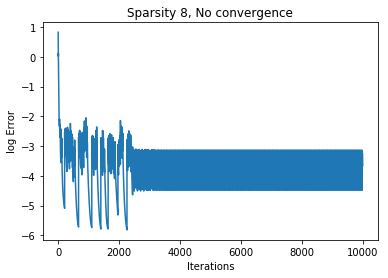

In [40]:
sparse = 8
a = np.random.rand(3, 4, 5)

b, errors = RRR(a, equiPartProj, sparseProj, 0.5, 1e-4, 10000, True)

#print t*sparseProj(b)
print len(errors)
print t*sparseProj(equiPartProj(b))
#plt.plot(range(len(errors)), errors)
#plt.show()
plt.plot([math.log(e) for e in errors])
plt.xlabel("Iterations")
plt.ylabel("log Error")
plt.title("Sparsity 8, No convergence")
plt.show()

For 9, however, we get convergence quite easily.

864
[[[  0.           0.           0.           0.          10.01549548]
  [  2.98113914   0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           7.01314147   0.        ]]

 [[  0.           0.           0.           0.           0.        ]
  [  0.           0.          12.01406596   0.           0.        ]
  [  0.           5.9934663    0.           0.           0.        ]
  [  0.           0.           0.           0.           1.98542899]]

 [[  0.           0.           0.           4.98392665   0.        ]
  [  0.           0.           0.           0.           0.        ]
  [  9.01543308   0.           0.           0.           0.        ]
  [  0.           6.00501286   0.           0.           0.        ]]]


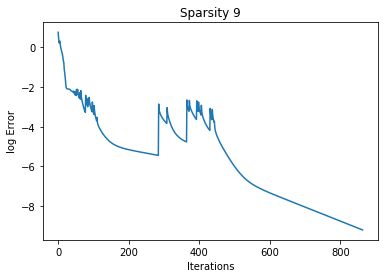

In [68]:
sparse = 9

a = np.random.rand(3, 4, 5)

b, errors = RRR(a, equiPartProj, lambda x: sparseProj(x, 9), 0.5, 1e-4, 10000, True)

#print t*sparseProj(b)
print len(errors)
print t*sparseProj(equiPartProj(b))
#plt.plot(range(len(errors)), errors)
#plt.show()
plt.plot([math.log(e) for e in errors])
plt.xlabel("Iterations")
plt.ylabel("log Error")
plt.title("Sparsity 9")
plt.show()

Now, we just format $b$ to get us the slice sizes.

In [73]:
c = t*sparseProj(equiPartProj(b))

c = np.round(c, 1)

print c

[[[  0.   0.   0.   0.  10.]
  [  3.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.]
  [  0.   0.   0.   7.   0.]]

 [[  0.   0.   0.   0.   0.]
  [  0.   0.  12.   0.   0.]
  [  0.   6.   0.   0.   0.]
  [  0.   0.   0.   0.   2.]]

 [[  0.   0.   0.   5.   0.]
  [  0.   0.   0.   0.   0.]
  [  9.   0.   0.   0.   0.]
  [  0.   6.   0.   0.   0.]]]


Here is a more elegant way to print it, which shows whose plate each size slice goes to in each case:

In [74]:
for i in range(3):
    for j in range(4):
        for k in range(5):
            if c[i, j, k] > 0:
                print str(int(c[i, j, k])) + ": " + str((i, j, k))

10: (0, 0, 4)
3: (0, 1, 0)
7: (0, 3, 3)
12: (1, 1, 2)
6: (1, 2, 1)
2: (1, 3, 4)
5: (2, 0, 3)
9: (2, 2, 0)
6: (2, 3, 1)


That's all for problem 2!